Data cleaning.

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Data.csv')
# top20 = df.nlargest(20,['metric_value'])
df = df[df.metric_value > 100]
df = df[df['metric_name'].str.contains("1day")]
count = df['metric_name'].value_counts().head(20) 
print(count) 

google.accounts:num_1day_logins                                      1577
google.calendar:num_1day_active_users                                1561
google.gmail:num_1day_imap_users                                     1536
google.gmail:num_1day_webmail_users                                  1536
google.gmail:num_1day_active_users                                   1531
google.drive:num_1day_active_users                                    774
google.drive:num_1day_google_documents_active_users                   757
google.drive:num_1day_other_types_active_users                        757
google.drive:num_1day_google_spreadsheets_active_users                756
google.apps_scripts:num_1day_active_users                             750
google.drive:num_1day_google_presentations_active_users               638
google.apps_scripts:num_1day_active_apps                              606
google.gplus:num_1day_active_users                                    472
google.docs:num_1day_active_users     

Function to analyze data and create line_graph.

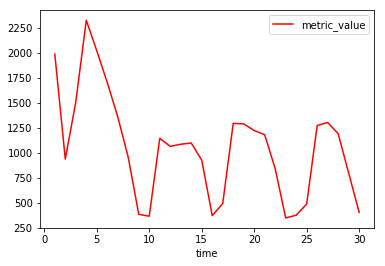

In [148]:
df['time'] = pd.to_datetime(df['time'])
df = df[df.metric_value != 0]
df = df[pd.to_datetime(df['time']).dt.month == 5]
df = df[pd.to_datetime(df['time']).dt.year == 2015]
df = df[df.metric_name == 'google.docs:num_1day_active_users']
df["time"] = df['time'].dt.strftime("%d").astype(int)
ax = plt.gca()
df.plot(kind='line',x='time',y='metric_value', color='red', ax=ax)
plt.show()

Create bar-graph and 5-number summary.

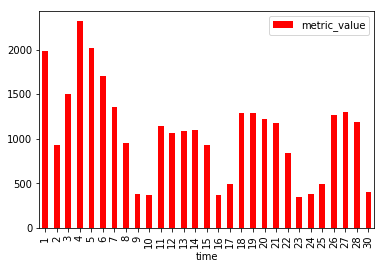

Minimum:  350
Q1:  493.0
Median:  1098.0
Q3:  1294.0
Maximum:  2324
       time                        metric_name  metric_value
9842      1  google.docs:num_1day_active_users          1986
10092     2  google.docs:num_1day_active_users           937
10342     3  google.docs:num_1day_active_users          1507
10592     4  google.docs:num_1day_active_users          2324
10842     5  google.docs:num_1day_active_users          2019
11092     6  google.docs:num_1day_active_users          1702
11342     7  google.docs:num_1day_active_users          1359
11592     8  google.docs:num_1day_active_users           954
11842     9  google.docs:num_1day_active_users           386
12092    10  google.docs:num_1day_active_users           367
12342    11  google.docs:num_1day_active_users          1145
12592    12  google.docs:num_1day_active_users          1064
12839    13  google.docs:num_1day_active_users          1086
13086    14  google.docs:num_1day_active_users          1098
13333    15  goog

In [146]:
df.plot(kind='bar',x='time',y='metric_value',color='red')
plt.show()

# calculate a 5-number summary
from numpy import percentile
# calculate quartiles
quartiles = percentile(df['metric_value'], [25, 50, 75])
# calculate min/max
data_min, data_max = df['metric_value'].min(), df['metric_value'].max()
# print 5-number summary
print('Minimum: ',data_min)
print('Q1: ',quartiles[0])
print('Median: ',quartiles[1])
print('Q3: ',quartiles[2])
print('Maximum: ',data_max)
print(df)